# Computational finance set 3
Sander Broos, Nick van Santen

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from finite_diff import FiniteDiff, black_scholes_formula
from scipy.optimize import curve_fit

In [2]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

## Part 2

In [13]:
# Compute finite difference grid for FTCS and CN

Nt = 2000
NX = 2000

field_FTCS = FiniteDiff(propagate_scheme="FTCS", Nt=Nt, NX=NX)
field_CN = FiniteDiff(propagate_scheme="CN", Nt= Nt, NX=NX)

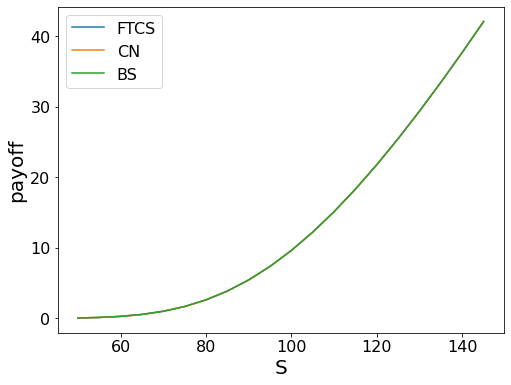

In [22]:
# Plot option price as a function of S0 for FTCS, CN and BS

payoffs_FTCS = []
payoffs_CN = []
payoffs_BS = []

Ss = np.arange(50, 150, 5)
for S in Ss:

    payoffs_FTCS.append(field_FTCS.get_payoff_for_S(S))
    payoffs_CN.append(field_CN.get_payoff_for_S(S))
    payoffs_BS.append(black_scholes_formula(S=S)[0])

plt.plot(Ss, payoffs_FTCS, label="FTCS")
plt.plot(Ss, payoffs_CN, label="CN")
plt.plot(Ss, payoffs_BS, label="BS")

plt.xlabel("S")
plt.ylabel("payoff")

plt.legend()
plt.show()

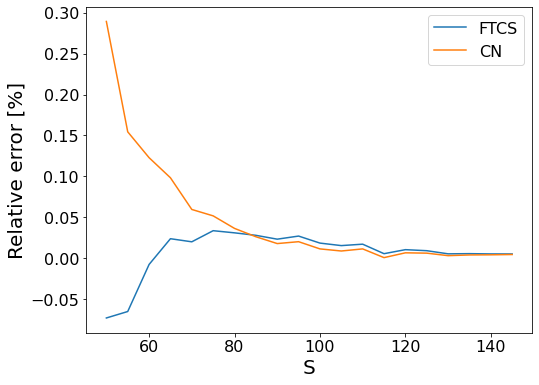

In [23]:
# Compare relative errors of option price compared to BS

relative_error_FTCS = []
relative_error_CN = []

def relative_error(exact, approx):

    return (approx - exact) / exact * 100

for i in range(len(payoffs_BS)):

    relative_error_FTCS.append(relative_error(payoffs_BS[i], payoffs_FTCS[i]))
    relative_error_CN.append(relative_error(payoffs_BS[i], payoffs_CN[i]))

plt.plot(Ss, relative_error_FTCS, label="FTCS")
plt.plot(Ss, relative_error_CN, label="CN")

plt.xlabel("S")
plt.ylabel("Relative error [%]")

plt.legend()
plt.show()

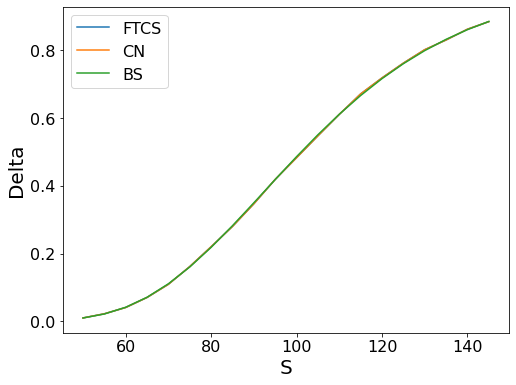

In [24]:
# Plot delta as a function of S0 for FTCS, CN and BS

deltas_FTCS = []
deltas_CN = []
deltas_BS = []

Ss = np.arange(50, 150, 5)
for S in Ss:

    deltas_FTCS.append(field_FTCS.calc_delta(S))
    deltas_CN.append(field_CN.calc_delta(S))
    deltas_BS.append(black_scholes_formula(S=S)[1])

plt.plot(Ss, deltas_FTCS, label="FTCS")
plt.plot(Ss, deltas_CN, label="CN")
plt.plot(Ss, deltas_BS, label="BS")

plt.xlabel("S")
plt.ylabel("Delta")

plt.legend()
plt.show()

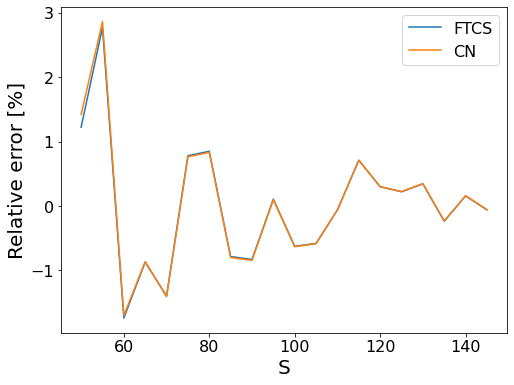

In [25]:
# Compare relative errors of delta compared to BS

relative_error_delta_FTCS = []
relative_error_delta_CN = []

def relative_error(exact, approx):

    return (approx - exact) / exact * 100

for i in range(len(deltas_BS)):

    relative_error_delta_FTCS.append(relative_error(deltas_BS[i], deltas_FTCS[i]))
    relative_error_delta_CN.append(relative_error(deltas_BS[i], deltas_CN[i]))

plt.plot(Ss, relative_error_delta_FTCS, label="FTCS")
plt.plot(Ss, relative_error_delta_CN, label="CN")

plt.xlabel("S")
plt.ylabel("Relative error [%]")

plt.legend()
plt.show()

In [7]:
# Compute payoffs at for different NX

S=120
Nt = 1000

payoffs_FTCS = []
payoffs_CN = []
payoffs_BS = []

NXs = np.linspace(100, 1000, 50, dtype=int)
for NX in NXs:
    print(NX, end="\r")

    field_FTCS = FiniteDiff(propagate_scheme="FTCS", Nt=Nt, NX=NX)
    field_CN = FiniteDiff(propagate_scheme="CN", Nt= Nt, NX=NX)

    payoffs_FTCS.append(field_FTCS.get_payoff_for_S(S))
    payoffs_CN.append(field_CN.get_payoff_for_S(S))
    payoffs_BS.append(black_scholes_formula(S=S)[0])

a = 18484.007387086407
r_squared=0.7987854316295704


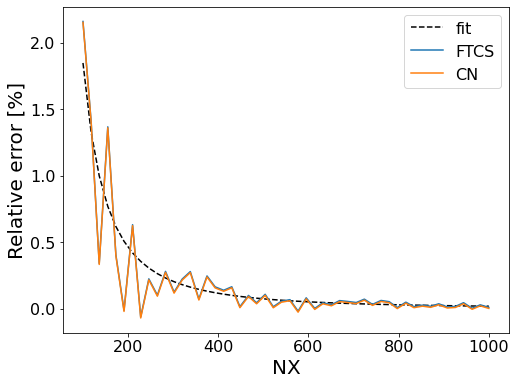

In [13]:
# Plot relative error as a function of NX

relative_error_payoff_FTCS = []
relative_error_payoff_CN = []
def relative_error(exact, approx):

    return (approx - exact) / exact * 100
for i in range(len(NXs)):

    relative_error_payoff_FTCS.append(relative_error(payoffs_BS[i], payoffs_FTCS[i]))
    relative_error_payoff_CN.append(relative_error(payoffs_BS[i], payoffs_CN[i]))


def f(x, a):
    return a / x**2

relative_error_payoff_FTCS = np.array(relative_error_payoff_FTCS)

popt, pcov = curve_fit(f, NXs, relative_error_payoff_FTCS)
print(f"a = {popt[0]}")

residuals = relative_error_delta_FTCS - f(NXs, popt[0])
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((relative_error_payoff_FTCS - np.mean(relative_error_payoff_FTCS)**2))
r_squared = 1 - (ss_res / ss_tot)
print(f"r_squared={r_squared}")
fitted_values = [f(x, popt[0]) for x in NXs]

plt.plot(NXs, fitted_values, label="fit", color="k", ls="--")
plt.plot(NXs, relative_error_payoff_FTCS, label="FTCS")
plt.plot(NXs, relative_error_payoff_CN, label="CN")

plt.xlabel("NX")
plt.ylabel("Relative error [%]")

plt.legend()
plt.show()

## Part 3

Error compared to Black-Scholes value.

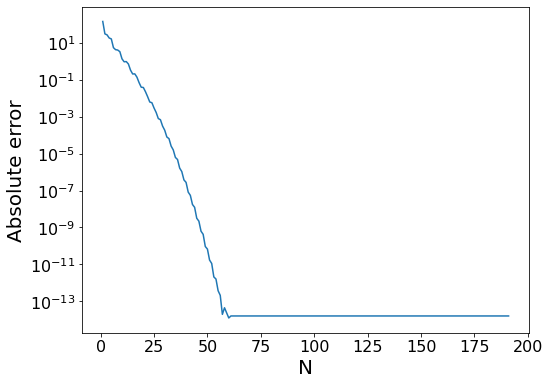

In [10]:
from COS import COS_euro_call

cos_model = COS_euro_call(S0=100, K=99, r=0.06, T=1, vol=0.2)
BS_value = cos_model.black_scholes()
N_values = range(1, 192)
COS_prices = []

for N in N_values:
    COS_prices.append(cos_model.V(N))

plt.yscale('log')
plt.plot(N_values, np.abs(np.array(COS_prices) - BS_value))
plt.ylabel("Absolute error")
plt.xlabel("N")
plt.show()

# TODO questions to ask:
    # what does IIIB refer to in the question? Can I just use these parameters?
    # why x-a in the exponent of F() instead of -a?
    # why increase N beyond 64 if it makes no difference